In [4]:
import numpy as np 
import skgstat as skg 
import matplotlib.pyplot as plt 

In [2]:
#génération de données aléatoires 

coords = np.random.randint(0,100, size=(200,2)).astype('float32')
vals = np.random.randint(100, size=200).astype('float32')

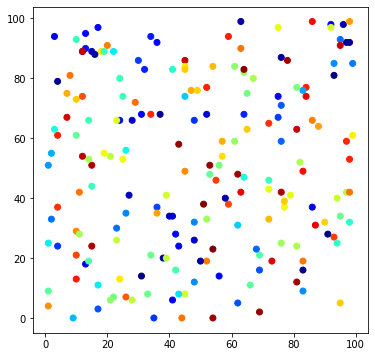

In [8]:
#affichage des données

plt.figure(figsize = (6,6))
plt.scatter(coords[:,0], coords[:,1], c = vals, cmap = 'jet')
plt.show()

In [10]:
# création d'un variogramme
vg = skg.Variogram(coords, vals, model='spherical', n_lags=6)

In [11]:
vg.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 3969.587536518496,
 'normalized_sill': 914503.4237234261,
 'normalized_nugget': 0,
 'effective_range': 29.237187423943247,
 'sill': 919.187693556458,
 'nugget': 0,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'even',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': False,
  'maxlag': None,
  'n_lags': 6,
  'verbose': False},
 'kwargs': {}}

sill = portée = 919

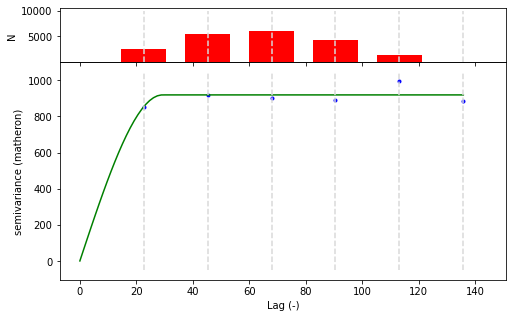

In [15]:
vg.plot(show=False)
plt.show()

In [16]:
ok = skg.OrdinaryKriging(vg)

In [17]:
#création d'une grille où l'on va interpoler 
x = coords[:, 0]
y = coords[:, 1]
xx, yy = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]

In [18]:
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
s2 = ok.sigma.reshape(xx.shape)

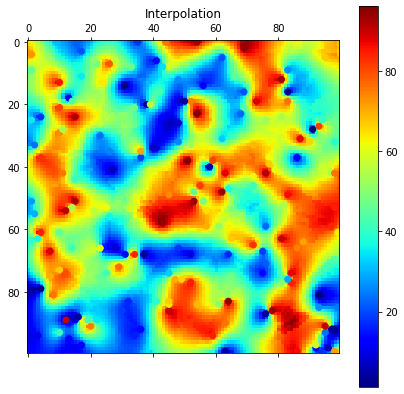

In [38]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
ax.scatter(coords[:,0], coords[:,1], c = vals, cmap='jet')
m = ax.matshow(field.T, cmap = 'jet')
plt.title('Interpolation')
plt.colorbar(m)
plt.show()

In [56]:
#interpolation spatiale
from scipy.spatial.distance import pdist, squareform
from skgstat.models import spherical

In [42]:
s0 = [np.var(coords[:,0]), np.var(coords[:,1])]

In [43]:
distance_matrix = pdist([s0] + list(zip(coords[:,0],coords[:,1])))

In [44]:
distance_matrix

array([1122.41643971, 1116.77329503, 1144.92783512, ...,   65.60487787,
         51.2249939 ,   20.        ])

In [48]:
model_spherical = lambda h: spherical(h, 20, 900, 0)
#lags = 7, seuil = 

In [67]:
variances = model_spherical(distance_matrix[:200])

In [65]:
variances.shape

(20100,)

In [68]:
len(variances)

200

In [54]:
dists = pdist(list(zip(coords[:,0],coords[:,1])))

In [55]:
from scipy.linalg import solve

In [60]:
M = squareform(model_spherical(dists))

In [62]:
M.shape

(200, 200)

In [70]:
a = solve(M, variances)

C:\Users\rbjnv\AppData\Local\Temp/ipykernel_15852/1641983914.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=5.66488e-35): result may not be accurate.
  a = solve(M, variances)


In [72]:
a.shape

(200,)

In [73]:
np.sum(a)

1.5